
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-трансляций-НМИЦ-онкологии-им.-Н.Н.-Петрова" data-toc-modified-id="Анализ-трансляций-НМИЦ-онкологии-им.-Н.Н.-Петрова-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ трансляций НМИЦ онкологии им. Н.Н. Петрова</a></span><ul class="toc-item"><li><span><a href="#Импортируем-библиотеки" data-toc-modified-id="Импортируем-библиотеки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импортируем библиотеки</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Выгрузим-все-датасеты" data-toc-modified-id="Выгрузим-все-датасеты-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Выгрузим все датасеты</a></span></li><li><span><a href="#Обработаем-просмотры-трансляций-(data)" data-toc-modified-id="Обработаем-просмотры-трансляций-(data)-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Обработаем просмотры трансляций (data)</a></span></li><li><span><a href="#Обработаем-описание-базы-данных-(database_description)" data-toc-modified-id="Обработаем-описание-базы-данных-(database_description)-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Обработаем описание базы данных (database_description)</a></span></li><li><span><a href="#Обработаем-асписание-выступлений-2022/2023-(schedule_2022/schedule_2023)" data-toc-modified-id="Обработаем-асписание-выступлений-2022/2023-(schedule_2022/schedule_2023)-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Обработаем асписание выступлений 2022/2023 (schedule_2022/schedule_2023)</a></span></li><li><span><a href="#Обработаем-расписание-небольших-мероприятий-(small_events)" data-toc-modified-id="Обработаем-расписание-небольших-мероприятий-(small_events)-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Обработаем расписание небольших мероприятий (small_events)</a></span></li><li><span><a href="#Обработаем-словарь-рубрик-белые-ночи-2022/2023-(schedule)" data-toc-modified-id="Обработаем-словарь-рубрик-белые-ночи-2022/2023-(schedule)-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Обработаем словарь рубрик белые ночи 2022/2023 (schedule)</a></span></li></ul></li><li><span><a href="#Соединим-расписания-мероприятий-и-их-просмотры" data-toc-modified-id="Соединим-расписания-мероприятий-и-их-просмотры-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Соединим расписания мероприятий и их просмотры</a></span></li><li><span><a href="#Соединим-расписания-мероприятий-и-их-просмотры-с-словарем-рубрик-белые-ночи" data-toc-modified-id="Соединим-расписания-мероприятий-и-их-просмотры-с-словарем-рубрик-белые-ночи-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Соединим расписания мероприятий и их просмотры с словарем рубрик белые ночи</a></span></li><li><span><a href="#Предобработка-просмотров" data-toc-modified-id="Предобработка-просмотров-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Предобработка просмотров</a></span></li><li><span><a href="#Группы-пользователей-по-интересам-для-автоматизации-рассылки-приглашений-на-мероприятия" data-toc-modified-id="Группы-пользователей-по-интересам-для-автоматизации-рассылки-приглашений-на-мероприятия-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Группы пользователей по интересам для автоматизации рассылки приглашений на мероприятия</a></span></li></ul></li><li><span><a href="#Дашбор" data-toc-modified-id="Дашбор-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Дашбор</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Анализ трансляций НМИЦ онкологии им. Н.Н. Петрова

Цель исследования:

     - Определить наиболее интересные темы и популярных спикеров по всем мероприятиям суммарно и по каждому в отдельности. Особенно важно это сделать для крупных форумов.
    - Выявить группы пользователей по интересам для автоматизации рассылки приглашений на мероприятия
    - Построить наглядные визуализации, которые смогут лечь в основу дашборда по мероприятиям
    - Предоставить рекомендации по наполнению для будущих мероприятий

План работ:

    1. Предобработка необходимых для работы датасетов
    2. Соединение таблиц
    3. Удаление дубликатов
    4. Построение дашборда
    5. Выводы

In [1]:

#app.run(jupyter_mode="external")

### Импортируем библиотеки

In [2]:
# !pip install jupyter-dash
# !pip install plotly --upgrade


In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta as tm
import re
from dateutil.parser import parse
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
#from dash import Dash, dcc, html, Input, Output, State
from IPython.display import Image
warnings.filterwarnings('ignore')

/var/folders/jv/80hv5_095lx5kknrzvn08w580000gn/T/ipykernel_64795/1014778374.py:11: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/jv/80hv5_095lx5kknrzvn08w580000gn/T/ipykernel_64795/1014778374.py:12: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


### Предобработка данных

#### Выгрузим все датасеты

In [4]:
# data - датасет с просмотрами трасляций
data = pd.read_csv('all_events.csv',sep=';')
# database_description -  Описание базы данных
database_description =  pd.read_excel('Описание базы данных.xlsx')
# schedule_2022 - Расписание выступлений 2022
schedule_2022 =  pd.read_excel('Расписание выступлений 11.xlsx')
# schedule_2023 - Расписание выступлений 2023
schedule_2023 =  pd.read_excel('Расписание выступлений 12.xlsx')
# schedule - Словарь рубрик белые ночи
schedule =  pd.read_excel('Словарь рубрик 11-12.xlsx')
# small_events - Расписание небольшие мероприятия
small_events =  pd.read_excel('Расписание_небольших_мероприятий.xlsx')
data_copy = data.copy()

#### Обработаем просмотры трансляций (data)

In [5]:
# Вывод  датасетов
print("Датасет data:")
display(data)

print("Датасет data:")
display(data.info())

Датасет data:


,UID,OID,BARCODE,COUNTRY,REGION,CITY,PROFESSION,SPECIALIZATION,"Общее время просомтра, мин",ПОТОК,...,"Время просомтра, мин",Кол-во кликов,ID открытой сессии,ID закрытой сессии,IP,Unnamed: 22,SERVER SESSION ID,Статус открытия,Статус закрытия,Мероприятие
0,16573.0,626199.0,0809202204421616573,Россия,Амурская обл.,NaN,Врач,онкология: хирургия (огш),52.0,1.0,...,2,NaN,NaN,vEg3gydkv6KzcG,NaN,NaN,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,PLAY_START,DESTROY_PAUSE,Мероприятие 1
1,16573.0,626199.0,0809202204421616573,Россия,Амурская обл.,NaN,Врач,онкология: хирургия (огш),52.0,1.0,...,3 сек.,NaN,NaN,vEg3gydkv6KzcG,NaN,NaN,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,PLAY_RESTART_PAUSE,NaN,Мероприятие 1
2,16573.0,626199.0,0809202204421616573,Россия,Амурская обл.,NaN,Врач,онкология: хирургия (огш),52.0,1.0,...,3,NaN,NaN,bquNyVcL7eCLeE,NaN,NaN,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,PLAY_START,DESTROY_STOP,Мероприятие 1
3,16573.0,626199.0,0809202204421616573,Россия,Амурская обл.,NaN,Врач,онкология: хирургия (огш),52.0,1.0,...,15,NaN,NaN,bquNyVcL7eCLeE,NaN,NaN,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,PLAY_RESTART_STOP,DESTROY_PAUSE,Мероприятие 1
4,16573.0,626199.0,0809202204421616573,Россия,Амурская обл.,NaN,Врач,онкология: хирургия (огш),52.0,1.0,...,5,NaN,NaN,bquNyVcL7eCLeE,NaN,NaN,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,PLAY_RESTART_PAUSE,DESTROY_PAUSE,Мероприятие 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154328,20713.0,921636.0,0106202338431320713,Россия,Санкт-Петербург и область,Санкт-Петербург,средний медпероснал,анестезиология-реаниматология,0.0,3.0,...,32 мин.,NaN,NaN,jW9dYv7KjTrYLg,NaN,NaN,td0zvTwROCmRz4mVq6e26uU6EOA19uns,PLAY_RESTART_PAUSE,DESTROY_STOP,Мероприятие 12
154329,20713.0,921636.0,0106202338431320713,Россия,Санкт-Петербург и область,Санкт-Петербург,средний медпероснал,анестезиология-реаниматология,0.0,3.0,...,0 сек.,NaN,jW9dYv7KjTrYLg,NaN,NaN,NaN,td0zvTwROCmRz4mVq6e26uU6EOA19uns,PLAY_RESTART_PAUSE,NaN,Мероприятие 12
154330,20713.0,921636.0,0106202338431320713,Россия,Санкт-Петербург и область,Санкт-Петербург,средний медпероснал,анестезиология-реаниматология,0.0,3.0,...,0 сек.,NaN,jW9dYv7KjTrYLg,NaN,NaN,NaN,td0zvTwROCmRz4mVq6e26uU6EOA19uns,PLAY_RESTART_PAUSE,NaN,Мероприятие 12
154331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Мероприятие 12


Датасет data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154333 entries, 0 to 154332
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   UID                         134779 non-null  float64
 1   OID                         135694 non-null  float64
 2   BARCODE                     135694 non-null  object 
 3   COUNTRY                     127206 non-null  object 
 4   REGION                      118648 non-null  object 
 5   CITY                        133047 non-null  object 
 6   PROFESSION                  133191 non-null  object 
 7   SPECIALIZATION              131793 non-null  object 
 8   Общее время просомтра, мин  135694 non-null  float64
 9   ПОТОК                       135694 non-null  float64
 10  Устройство                  135694 non-null  object 
 11  Оп.сис                      135693 non-null  object 
 12  Броузер                     135693 non-null  object 
 13  

None

In [6]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (25,10), rot = 0, legend = False, fontsize = 16)
            .set_title('Пропуски по столбцам' + "\n", fontsize = 22, color = 'SteelBlue')
        );
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

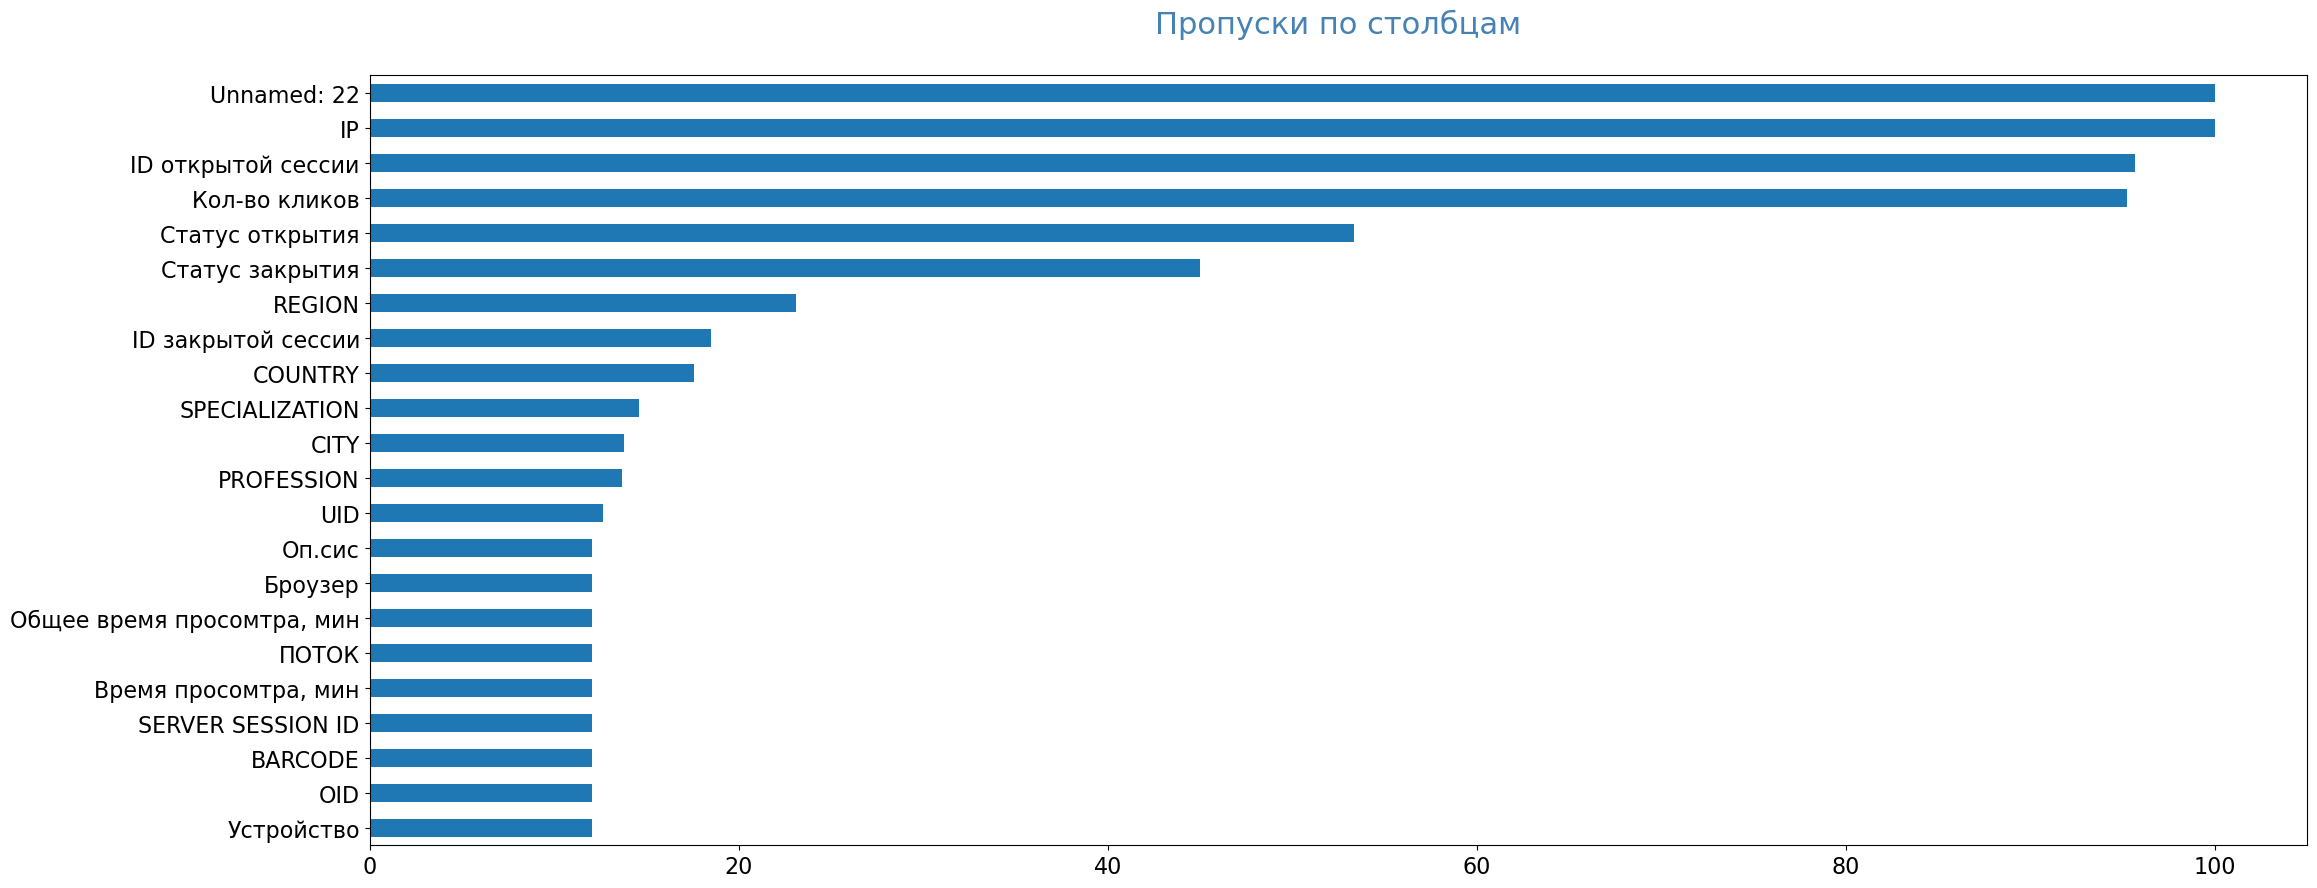

In [7]:
# Построим график с пропусками
pass_value_barh(data)

Выведем дубликаты и удалим их.

In [8]:
# Вывод дубликатов
print(f'Количество дубликатов в датасет: {data.duplicated().sum()}')
print(f'Процент содержания дубликатов в датасете: {data.duplicated().sum()/data.shape[0]:.2f}%')


Количество дубликатов в датасет: 20130
Процент содержания дубликатов в датасете: 0.13%


In [9]:
# Удаление дубликатов
data =data.drop_duplicates(ignore_index=True)

Переименуем столбцы

In [10]:
# Привести значения columns к нижнему регистру
data.columns = data.columns.str.lower()

# Создать словарь для замен
translation_dict = {
    'общее время просомтра, мин': 'total_viewing_time',
    'поток': 'course_flow',
    'устройство': 'device',
    'оп.сис': 'operating_system',
    'броузер': 'browser',
    'время начала': 'start_time',
    'время окончания': 'end_time',
    'timestamp начала': 'start_timestamp',
    'timestamp окончания': 'end_timestamp',
    'время просомтра, мин': 'watching_time',
    'кол-во кликов': 'clicks',
    'id открытой сессии': 'id_open_session',
    'id закрытой сессии': 'id_close_session',
    'server session id': 'server_session_id',
    'статус открытия': 'opening_status',
    'статус закрытия': 'closing_status',
    'мероприятие': 'events'
}

# Переименование столбцов
data.rename(columns=translation_dict, inplace=True)
# Привести значения столбца 'country' к нижнему регистру
data.country = data.country.str.lower()

# Создадим смписок для переименования неявных дубликатов
rename_list = ['россия ','россич']
rename_list_unknown = ['undefined','1','выберите','unknown',' ','  ']

# Переименуем дубликаты
data.country = data.country.replace(rename_list, 'россия')
data.country = data.country.replace(rename_list_unknown, 'Unknown')

# Создадим смписок для переименования неявных дубликатов
nan_list = ['id_open_session', 'id_close_session', 'opening_status', \
            'closing_status', 'ip','country','browser','operating_system']

# Переименуем дубликаты
data[nan_list] = data[nan_list].fillna('Unknown')

In [11]:
# Привести значения столбца 'region' к нижнему регистру
data.region = data.region.str.lower()
# Заменить " обл." на " область"
data.region = data.region.str.replace('обл\.$', ' область')
# Заменить возможные NaN значения на 'Unknown'
data.region.fillna('Unknown', inplace=True)


# Избавление от неявных дубликатов
data.region = data.region.replace('башкортостан(башкирия)', 'башкортостан')
data.region = data.region.replace('пензенская', 'пензенская область')
data.region = data.region.replace('ульяновская', 'ульяновская область')
data.region = data.region.replace(rename_list_unknown, 'Unknown')



In [12]:
# Привести значения столбца 'city' к нижнему регистру
data.city = data.city.str.lower()
# Заменить возможные NaN значения на 'Unknown'
data.city.fillna('Unknown', inplace=True)
# Избавление от неявных дубликатов
data.city = data.city.replace('алма-ата', 'алматы')
data.city = data.city.replace('благовещенск ', 'благовещенск')
data.city = data.city.replace('волгоград ', 'волгоград')
data.city = data.city.replace('пенза ', 'пенза')
data.city = data.city.replace('санкт – петербург', 'санкт-петербург')
data.city = data.city.replace('санкт-петербург ', 'санкт-петербург')
data.city = data.city.replace('ю.сахалинск', 'южно-сахалинск')
data.city = data.city.replace('undefined', 'Unknown')
data.city = data.city.replace(rename_list_unknown, 'Unknown')

In [13]:
# Привести значения столбца 'profession' к нижнему регистру
data.profession = data.profession.str.lower()
# Заменить возможные NaN заменим на значения на 'Unknown'
data.profession.fillna('Unknown', inplace=True)

# Создать словарь для замен
profession_replacements = {
    'средний медперсонал': 'средний медпероснал',
    'врач - онколог, химиотерапевт': 'онколог, химиотерапевт',
    'врач -онколог': 'онколог',
    'врач онколог, химиотерапиевт': 'онколог, химиотерапевт',
    'студент медицинского вуза': 'студент',
    'врач-онколог,химиотерапевт': 'онколог, химиотерапевт',
    'нач мед': 'нач. мед',
    'врач-онколог': 'онколог',
    'немедициснкий персонал клиники': 'немедицинский персонал клиники',
    'зав отд. хт': 'заведующий отделением химиотерапии',
    'х/т зав отд': 'заведующий отделением химиотерапии',
    'зам.гл.врач': 'заместитель главного врача',
    'врач, химиотерапевт': 'химиотерапевт',
    'врач хт': 'химиотерапевт',
    'онколог , хт': 'онколог, химиотерапевт',
    'зав отдел х/т': 'зав. отделением химиотерапии',
    'зав. отд. химиотерапии': 'зав. отделением химиотерапии',
    'зав.отд': 'зав. отделением',
    'заместитель главного врачаа': 'заместитель главного врача',
    'зав. отделениемелением хт, химиотерапевт': 'зав. отделением химиотерапии',
    'руководитель группы проектов &quot;все не напрасно&quot;': 'руководитель группы проектов все не напрасно',
    'зав.1 онкологическим отделением': 'зав. отделением химиотерапии',
}

# Применить замены из словаря
data.profession = data.profession.replace(profession_replacements, regex=True)
data.profession = data.profession.replace(rename_list_unknown, 'Unknown')
# data.profession.unique()

In [14]:
# Привести значения столбца 'specialization' к нижнему регистру
data.specialization = data.specialization.str.lower()
# Заменить возможные NaN заменим на значения на 'Unknown'
data.specialization.fillna('Unknown', inplace=True)

# Создать словарь для замен
specialization_replacements = {
    'анестезиология, реанимация': 'анестезиология и реанимация',
    'анестезиология-реаниматология': 'анестезиология и реанимация',
    '$гинеколог': 'гинекология',
    'онколоигя': 'онкология',
    '$онколог': 'онкология',
    'патоморфолог': 'патоморфология',
    'уролог': 'урология',
    'хирург онколог': 'хирург-онколог',
}
# Применить замены из словаря
data.specialization = data.specialization.replace(specialization_replacements, regex=True)
data.specialization = data.specialization.replace(rename_list_unknown, 'Unknown')
# data.specialization.unique()


In [15]:
# Привести значения столбца 'region' к нижнему регистру
data.region = data.region.str.lower()
# Заменить " обл." на " область"
data.region = data.region.str.replace('обл\.$', ' область')
# Заменить возможные NaN значения на 'Unknown'
data.region.fillna('Unknown', inplace=True)
# Избавление от неявных дубликатов
data.region = data.region.replace('башкортостан(башкирия)', 'башкортостан')
data.region = data.region.replace('пензенская', 'пензенская область')
data.region = data.region.replace('ульяновская', 'ульяновская область')
data.region = data.region.replace('undefined', 'Unknown')
data.region = data.region.replace(rename_list_unknown, 'Unknown')



In [16]:
# Привести значения столбца 'city' к нижнему регистру
data.city = data.city.str.lower()
# Заменить возможные NaN заменим на значения на 'Unknown'
data.city.fillna('Unknown', inplace=True)
# Переименования неявных дубликатов
data.city = data.city.replace('алма-ата', 'алматы')
data.city = data.city.replace('благовещенск ', 'благовещенск')
data.city = data.city.replace('волгоград ', 'волгоград')
data.city = data.city.replace('пенза ', 'пенза')
data.city = data.city.replace('санкт – петербург', 'санкт-петербург')
data.city = data.city.replace('санкт-петербург ', 'санкт-петербург')
data.city = data.city.replace('ю.сахалинск', 'южно-сахалинск')
data.city = data.city.replace('undefined', 'Unknown')
data.city = data.city.replace(rename_list_unknown, 'Unknown')

sorted_unique_city = sorted(data.city.unique())

In [17]:
# Привести значения столбца 'profession' к нижнему регистру
data.profession = data.profession.str.lower()
# Заменить возможные NaN заменим на значения на 'Unknown'
data.profession.fillna('Unknown', inplace=True)



# Создать словарь для замен
profession_replacements = {
    'средний медперсонал': 'средний медпероснал',
    'врач - онколог, химиотерапевт': 'онколог, химиотерапевт',
    'врач -онколог': 'онколог',
    'врач онколог, химиотерапиевт': 'онколог, химиотерапевт',
    'студент медицинского вуза': 'студент',
    'врач-онколог,химиотерапевт': 'онколог, химиотерапевт',
    'нач мед': 'нач. мед',
    'врач-онколог': 'онколог',
    'немедициснкий персонал клиники': 'немедицинский персонал клиники',
    'зав отд. хт': 'заведующий отделением химиотерапии',
    'х/т зав отд': 'заведующий отделением химиотерапии',
    'зам.гл.врач': 'заместитель главного врача',
    'врач, химиотерапевт': 'химиотерапевт',
    'врач хт': 'химиотерапевт',
    'онколог , хт': 'онколог, химиотерапевт',
    'зав отдел х/т': 'зав. отделением химиотерапии',
    'зав. отд. химиотерапии': 'зав. отделением химиотерапии',
    'зав.отд': 'зав. отделением',
    'заместитель главного врачаа': 'заместитель главного врача',
    'зав. отделениемелением хт, химиотерапевт': 'зав. отделением химиотерапии',
    'руководитель группы проектов &quot;все не напрасно&quot;': 'руководитель группы проектов все не напрасно',
    'зав.1 онкологическим отделением': 'зав. отделением химиотерапии',
}

# Применить замены из словаря
data.profession = data.profession.replace(profession_replacements, regex=True)
data.profession = data.profession.replace(rename_list_unknown, 'Unknown')



In [18]:
# Привести значения столбца 'profession' к нижнему регистру
data.specialization = data.specialization.str.lower()
# Заменить возможные NaN заменим на значения на 'Unknown'
data.specialization.fillna('Unknown', inplace=True)

# Создать словарь для замен
specialization_replacements = {
    'анестезиология, реанимация': 'анестезиология и реанимация',
    'анестезиология-реаниматология': 'анестезиология и реанимация',
    '$гинеколог': 'гинекология',
    'онколоигя': 'онкология',
    '$онколог': 'онкология',
    'патоморфолог': 'патоморфология',
    'уролог': 'урология',
    'хирург онколог': 'хирург-онколог',
}
# Применить замены из словаря
data.specialization = data.specialization.replace(specialization_replacements, regex=True)
data.specialization = data.specialization.replace(rename_list_unknown, 'Unknown')


In [19]:
# Привести значения столбца 'profession' к нижнему регистру
data.device = data.device.str.lower()
# Привести значения столбца 'profession' к нижнему регистру
data.operating_system = data.operating_system.str.lower()
# Привести значения столбца 'profession' к нижнему регистру
data.browser = data.browser.str.lower()
# Привести значения столбца 'events' к нижнему регистру
data.events = data.events.str.lower()

In [20]:
# Все возможные NaN заменим на значения на 'Unknown'
data.fillna('Unknown', inplace=True)

Посчитаем процент по всем основным данным необходимых для анализа

In [21]:
# Созданик датасета с пропусками

unknown_check = data[(data['country'] == 'Unknown') &
                     (data['region'] == 'Unknown') &
                     (data['city'] == 'Unknown') &
                     (data['profession'] == 'Unknown') &
                     (data['specialization'] == 'Unknown')

                    ]
print(f'Количество пропусков по всем данным в датасет: {len(unknown_check)}')
print(f'Процент пропусков : {len(unknown_check)/data.shape[0]:.2f}%')


Количество пропусков по всем данным в датасет: 992
Процент пропусков : 0.01%


In [22]:
# Удаление пропусков
data = data.drop(unknown_check.index)

In [23]:
# Оставляем только необходимые для анализа параметры
data = data[['uid','oid','country','region',\
             'city','profession','specialization','course_flow',\
             'device','operating_system','browser','start_time',\
             'end_time','start_timestamp','end_timestamp','ip',\
             'server_session_id','events','barcode'
            ]]

In [24]:
data.head()

,uid,oid,country,region,city,profession,specialization,course_flow,device,operating_system,browser,start_time,end_time,start_timestamp,end_timestamp,ip,server_session_id,events,barcode
0,16573.0,626199.0,россия,амурская обл.,Unknown,врач,онкология: хирургия (огш),1.0,десктоп,windows,chrome,13.03.2022 9:42,13.03.2022 9:44,1647153750,1647153857,Unknown,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,мероприятие 1,0809202204421616573
1,16573.0,626199.0,россия,амурская обл.,Unknown,врач,онкология: хирургия (огш),1.0,десктоп,windows,chrome,13.03.2022 9:51,13.03.2022 9:51,1647154294,1647154297,Unknown,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,мероприятие 1,0809202204421616573
2,16573.0,626199.0,россия,амурская обл.,Unknown,врач,онкология: хирургия (огш),1.0,десктоп,windows,chrome,13.03.2022 9:51,13.03.2022 9:54,1647154302,1647154495,Unknown,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,мероприятие 1,0809202204421616573
3,16573.0,626199.0,россия,амурская обл.,Unknown,врач,онкология: хирургия (огш),1.0,десктоп,windows,chrome,13.03.2022 9:54,13.03.2022 10:09,1647154497,1647155385,Unknown,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,мероприятие 1,0809202204421616573
4,16573.0,626199.0,россия,амурская обл.,Unknown,врач,онкология: хирургия (огш),1.0,десктоп,windows,chrome,13.03.2022 10:10,13.03.2022 10:14,1647155406,1647155697,Unknown,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,мероприятие 1,0809202204421616573


In [25]:
# Указать столбцы, в которых нужно изменить тип данных
columns_to_convert = ['oid','uid','course_flow']

# Изменить тип данных столбцов на int
data[columns_to_convert] = data[columns_to_convert].astype(int)

# Избавление от неявных дубликатов
data.course_flow = data.course_flow.astype(str) + ' поток'
data.course_flow = data.course_flow.replace('11 поток', '10 поток')


In [26]:
data.course_flow.unique()

array(['1 поток', '3 поток', '4 поток', '2 поток', '7 поток', '5 поток',
       '6 поток', '8 поток', '10 поток', '9 поток'], dtype=object)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133211 entries, 0 to 134202
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   uid                133211 non-null  int64 
 1   oid                133211 non-null  int64 
 2   country            133211 non-null  object
 3   region             133211 non-null  object
 4   city               133211 non-null  object
 5   profession         133211 non-null  object
 6   specialization     133211 non-null  object
 7   course_flow        133211 non-null  object
 8   device             133211 non-null  object
 9   operating_system   133211 non-null  object
 10  browser            133211 non-null  object
 11  start_time         133211 non-null  object
 12  end_time           133211 non-null  object
 13  start_timestamp    133211 non-null  int64 
 14  end_timestamp      133211 non-null  int64 
 15  ip                 133211 non-null  object
 16  server_session_id  133211

In [28]:
# Функцией parse помееяум тип данных на datetime
data.start_time = data.start_time.apply(lambda x: parse(x, dayfirst=True))
data.end_time = data.end_time.apply(lambda x: parse(x, dayfirst=True))

In [29]:
columns_ts = ['start_timestamp','end_timestamp']
# Преобразование столбцов в формат времени (datetime)
data[columns_ts] = data[columns_ts].apply(lambda x: pd.to_datetime(x, unit='s'), axis=1)
# Создание объекта timedelta с 3 часами
three_hours = tm(hours=3)

# Добавление 3 часов к исходной дате
data[['start_timestamp','end_timestamp']] = data[['start_timestamp','end_timestamp']] + three_hours

In [30]:
# Создаем столбец с датой события
data['date'] = pd.to_datetime(data['start_time'].dt.date)

#### Обработаем описание базы данных (database_description)

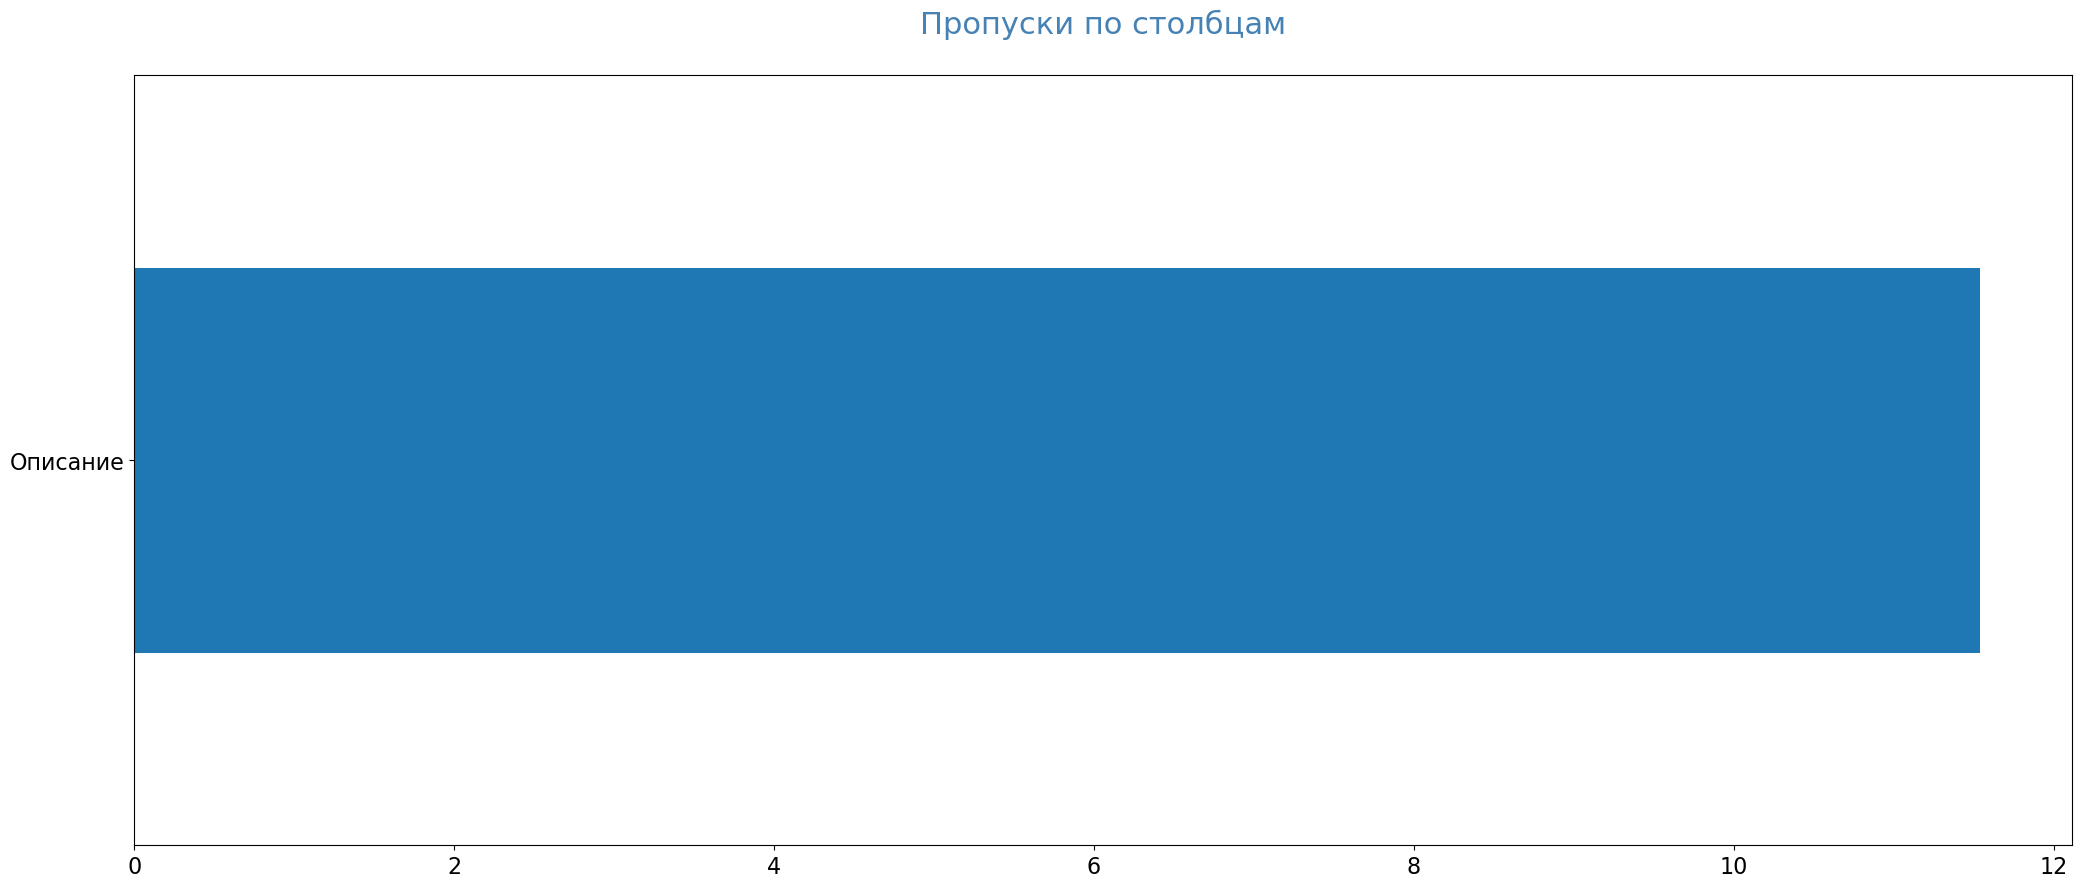

In [31]:
# Построим график с пропусками
pass_value_barh(database_description)

In [32]:

name_columns = data_copy.columns
# Создайте DataFrame из объекта name_columns с индексом
name_columns = pd.DataFrame(name_columns, columns=['new_name_columns'])

# Добавьте индекс к столбцу
name_columns['index'] = name_columns.index

# Опционально, можно установить индекс DataFrame name_columns_df равным столбцу 'index'
name_columns.set_index('index', inplace=True)


In [33]:
pd.set_option('display.max_colwidth', 500)
database_description = database_description.rename(columns={'поле':'columns','описание':'description'})
#  Создадим столбец с новыми названими columns
description = name_columns.merge(database_description, left_index=True, right_index=True)
display(description)

,new_name_columns,Поле,Описание
0,UID,UID,"Уникальный идентификатор пользователя, не меняется"
1,OID,OID,"Уникальный идентификатор участника, меняется от мероприятия к мероприятию"
2,BARCODE,BARCODE,"это билет, уникален для каждого участника (он выдается на мероприятие один раз, по нему мы отслеживаем оффлайн участников)"
3,COUNTRY,COUNTRY,страна
4,REGION,REGION,регион
5,CITY,CITY,город
6,PROFESSION,PROFESSION,профессия
7,SPECIALIZATION,SPECIALIZATION,специализация
8,"Общее время просомтра, мин","Общее время просомтра, мин",Это суммарный расчет времени просмотра пользователя. Вообще всего по базе. Пока никакой практической пользы не несет
9,ПОТОК,ПОТОК,"Это номер “потока” - куда транслировалась конкретная конференция, каждый день работает ограниченное количество потоков. Каждый день в этом потоке могут быть разные конференции в соответствии с расписанием"


#### Обработаем асписание выступлений 2022/2023 (schedule_2022/schedule_2023)

In [34]:
# Соедиеим расписаемя мероприятий
schedule2223 = pd.concat([schedule_2022, schedule_2023], ignore_index=True)
# Удаление дубликатов
schedule2223 =schedule2223.drop_duplicates(ignore_index=True)
# Удаляем строки, в которых все значения пропущены
schedule2223 = schedule2223.dropna(how='all')
# Переименование столбцов
schedule2223 = schedule2223.rename(columns={'Время начала\n(UTC+3 МСК)':'start_utc3',
                                              'Время окончания \n(UTC+3 МСК)':'end_utc3',
                                              'Продолжительность':'length',
                                              'Дата':'date',
                                              'Поток':'course_flow',
                                              'Название доклада':'report',
                                              'ФИО полностью':'name',
                                              'Учреждение/Организация':'organization',
                                              'Город':'city',
                                             })
# Избавление от неявных дубликатов
list_end_utc3 = ['до окончания операций','до окончания операци']
schedule2223.end_utc3 = schedule2223.end_utc3.replace(list_end_utc3, 'до окончания операции')
schedule2223  =schedule2223[schedule2223['end_utc3'] != 'Время окончания \n(UTC+3 МСК)']
schedule2223  =schedule2223[schedule2223['start_utc3'] != 'Поток №1']
schedule2223  =schedule2223[schedule2223['report'] != 'Перерыв в потоке']
schedule2223 = schedule2223[schedule2223['course_flow'] != 'Тренинг-комната']
# Установим огранмченмя опираций в 16:00
schedule2223.end_utc3 = schedule2223.end_utc3.replace('до окончания операции', '16:00:00')
# Удалим пропуски
schedule2223= schedule2223.dropna(subset=['start_utc3'])
schedule2223= schedule2223.dropna(subset=['date'])
# Удалим ненужный столбец
schedule2223.drop('length', axis=1, inplace=True)


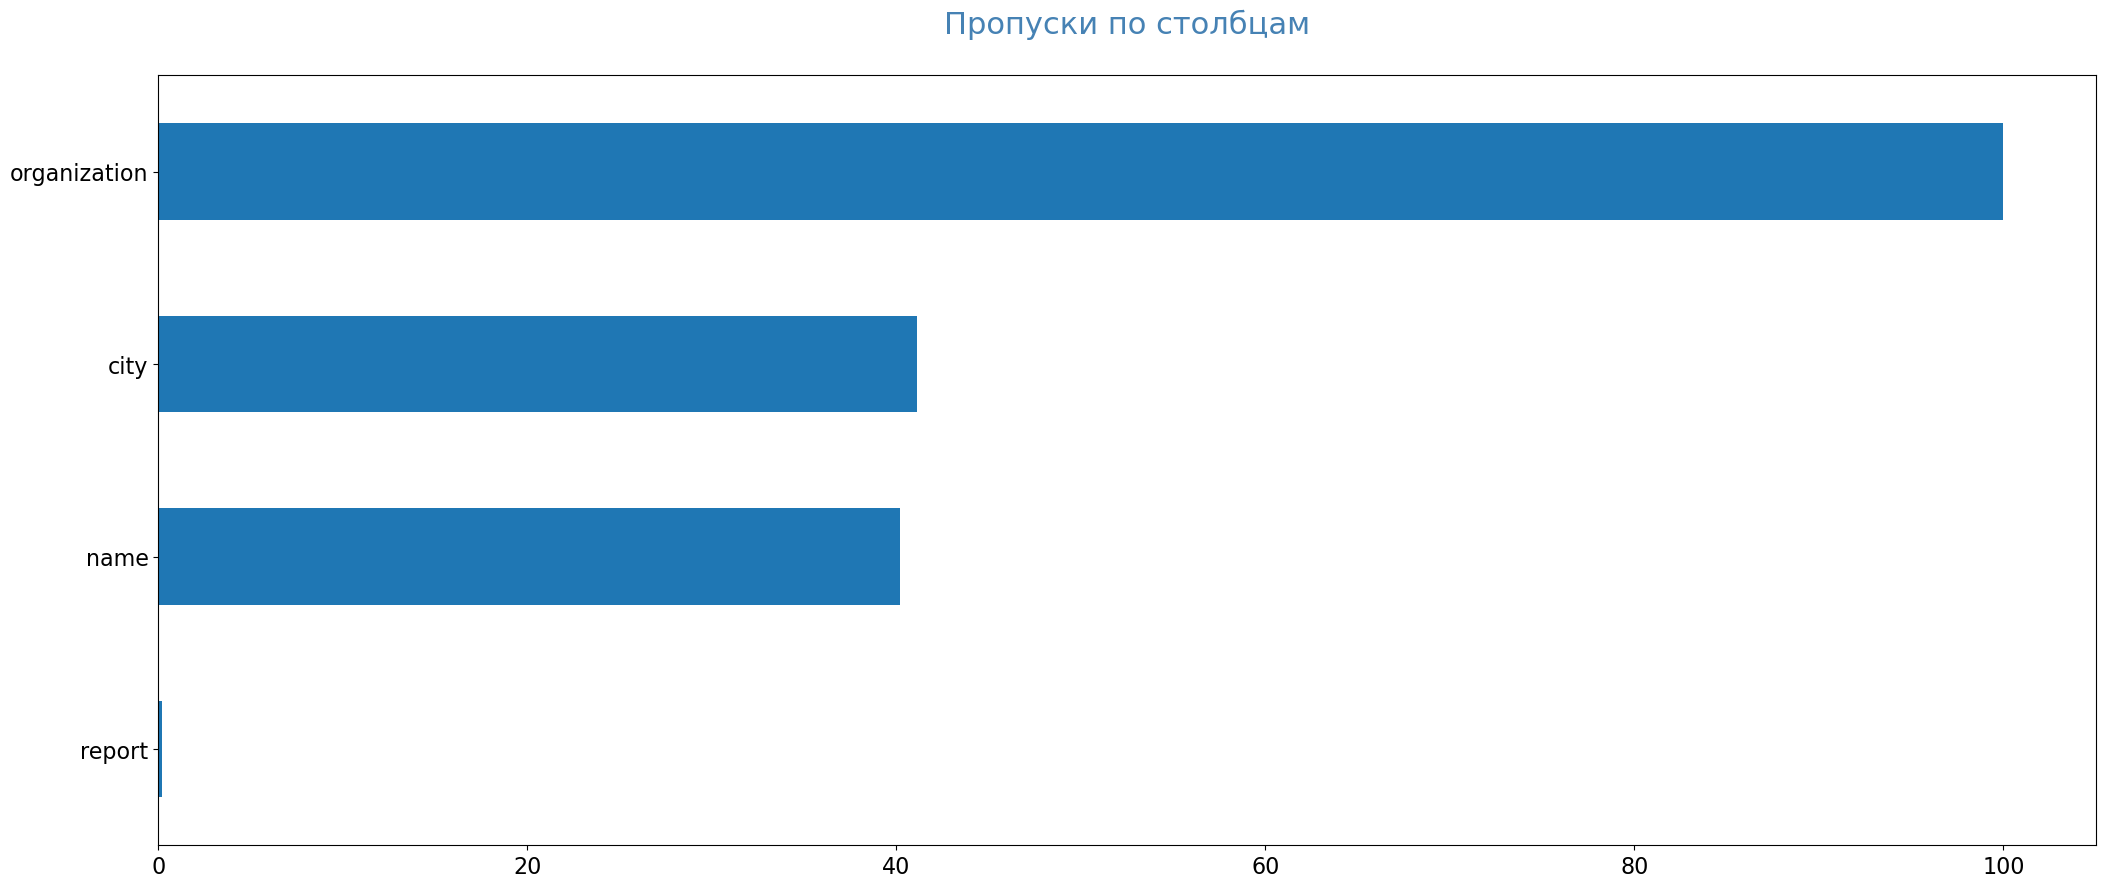

In [35]:
# Построим график с пропусками
pass_value_barh(schedule2223)

In [36]:
# Избавление от неявных дубликатов
schedule2223.course_flow = schedule2223.course_flow.replace('1 поток ', '1 поток')
schedule2223.course_flow = schedule2223.course_flow.replace('-', '1 поток')
schedule2223.course_flow = schedule2223.course_flow.replace('2 поток ', '2 поток')
schedule2223.course_flow = schedule2223.course_flow.replace('3 поток ', '3 поток')
schedule2223.course_flow = schedule2223.course_flow.replace('4 поток ', '4 поток')
schedule2223.course_flow = schedule2223.course_flow.replace('5 поток ', '5 поток')
schedule2223.course_flow = schedule2223.course_flow.replace('6 поток ', '6 поток')
schedule2223.course_flow = schedule2223.course_flow.replace('6.1 поток', '6 поток')
schedule2223.course_flow = schedule2223.course_flow.replace('10.1 поток', '10 поток')



In [37]:
# Преобразовываем в строку
schedule2223.start_utc3 = schedule2223.start_utc3.astype(str)
schedule2223.end_utc3 = schedule2223.end_utc3.astype(str)

# Извлекаем только время по шаблону
schedule2223.start_utc3 = schedule2223.start_utc3.str.extract(r'(\d{2}:\d{2}:\d{2})')[0]
schedule2223.end_utc3 = schedule2223.end_utc3.str.extract(r'(\d{2}:\d{2}:\d{2})')[0]
# Преобразовываем в дата-время формата ДД.ММ.ГГГГ
schedule2223.date = pd.to_datetime(schedule2223.date)
# Склеиваем, превращая в строки
schedule2223['start_time_full'] = schedule2223['date'].astype(str) + ' ' + schedule2223['start_utc3'].astype(str)
schedule2223['end_time_full'] = schedule2223['date'].astype(str) + ' ' + schedule2223['end_utc3'].astype(str)
# Преобразование столбцов в формат времени (datetime)
schedule2223['start_time_full'] = schedule2223['start_time_full'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))
schedule2223['end_time_full'] = schedule2223['end_time_full'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))



In [38]:
# Создадим список для замены
schedule2223 = schedule2223[['date','start_time_full','end_time_full','course_flow',\
                             'report','name','organization','city']]
# Привести значения столбца 'organization' к нижнему регистру
# schedule2223.organization = schedule2223.organization.str.lower()
# Привести значения столбца 'city' к нижнему регистру
schedule2223.city = schedule2223.city.str.lower()


In [39]:
# Создадим список для замены
report_list = ['Дискуссия ','Дискуссия  ','Дискуссия   ','Общая дискуссия участников сессии']
# Избавление от неявных дубликатов
schedule2223.report = schedule2223.report.replace(report_list, 'Дискуссия')

#### Обработаем расписание небольших мероприятий (small_events)

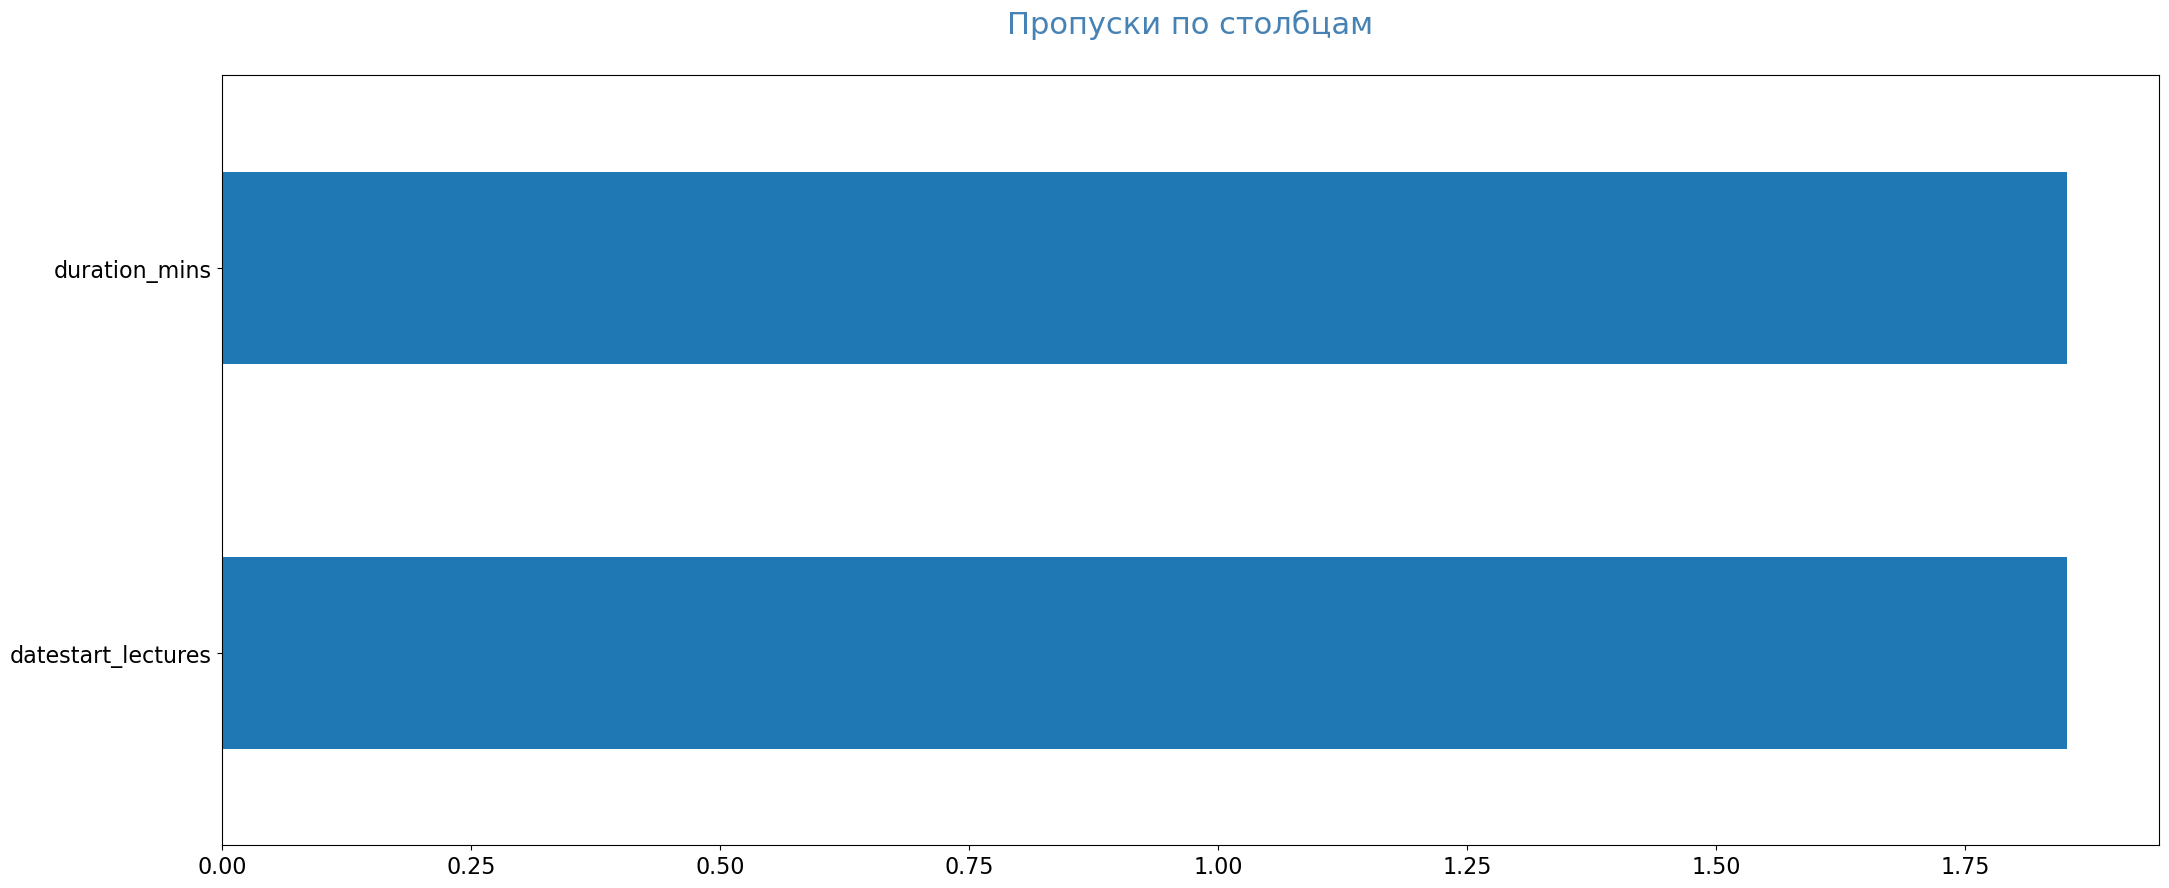

In [40]:
# Построим график с пропусками
pass_value_barh(small_events)

In [41]:
# Удаление дубликатов
small_events =small_events.drop_duplicates(ignore_index=True)
# Удаляем строки, в которых все значения пропущены
small_events = small_events.dropna(how='all')
# Создать словарь для замен сталбцов
small_events = small_events.rename(columns={
                                    'Поток':'course_flow',
                                    'datestart_lectures':'start_time_full',
                                    'datefinish_lectures':'end_time_full',
                                    'speaker_name':'name',
                                    'lecture_name':'report',
                                    })

# Функцией parse поменяем тип данных на datetime
# small_events.start_time_full = small_events.start_time_full.apply(lambda x: parse(x, dayfirst=True))
# small_events.end_time_full = small_events.end_time_full.apply(lambda x: parse(x, dayfirst=True))
# Преобразование столбцов в формат времени (datetime)
small_events['start_time_full'] = small_events['start_time_full'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))
small_events['end_time_full'] = small_events['end_time_full'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))

# Преобразование столбцов в формат времени (datetime)
small_events.date = pd.to_datetime(small_events.date, format='%d.%m.%Y')
small_events['course_flow'] = '1 поток'
small_events['start_time_full_с'] = small_events['start_time_full']
small_events['end_time_full_с'] = small_events['end_time_full']
small_events.dropna(how='any', inplace=True)


In [42]:
small_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 53
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               52 non-null     datetime64[ns]
 1   start_time_full    52 non-null     datetime64[ns]
 2   end_time_full      52 non-null     datetime64[ns]
 3   duration_mins      52 non-null     object        
 4   report             52 non-null     object        
 5   name               52 non-null     object        
 6   course_flow        52 non-null     object        
 7   start_time_full_с  52 non-null     datetime64[ns]
 8   end_time_full_с    52 non-null     datetime64[ns]
dtypes: datetime64[ns](5), object(4)
memory usage: 4.1+ KB


In [43]:
# Удалим ненужный столбец
# small_events.drop('duration_mins', axis=1, inplace=True)

In [44]:
#  Соедиеим расписаемя мероприятий с маленкими сабытиями
all_events  = pd.concat([schedule2223, small_events], ignore_index=True)
# Заполните все пропуски значением 'Unknown'
all_events.fillna('Unknown', inplace=True)


In [45]:
# Заменить "Unknown" значениями из столбца 'start_time_full_c'
all_events.loc[all_events['start_time_full_с'] == 'Unknown', 'start_time_full_с'] = all_events['start_time_full']
all_events.loc[all_events['end_time_full_с'] == 'Unknown', 'end_time_full_с'] = all_events['end_time_full']

#### Обработаем словарь рубрик белые ночи 2022/2023 (schedule)

In [46]:
# Удаляем строки, в которых все значения пропущены
schedule = schedule.dropna(how='all')
# Установить первую строку в качестве заголовков столбцов
schedule.columns = schedule.iloc[0]

# Удалить первую строку, так как она теперь является названиями столбцов
schedule = schedule[1:]

# Сбросить индексы
schedule.reset_index(drop=True, inplace=True)

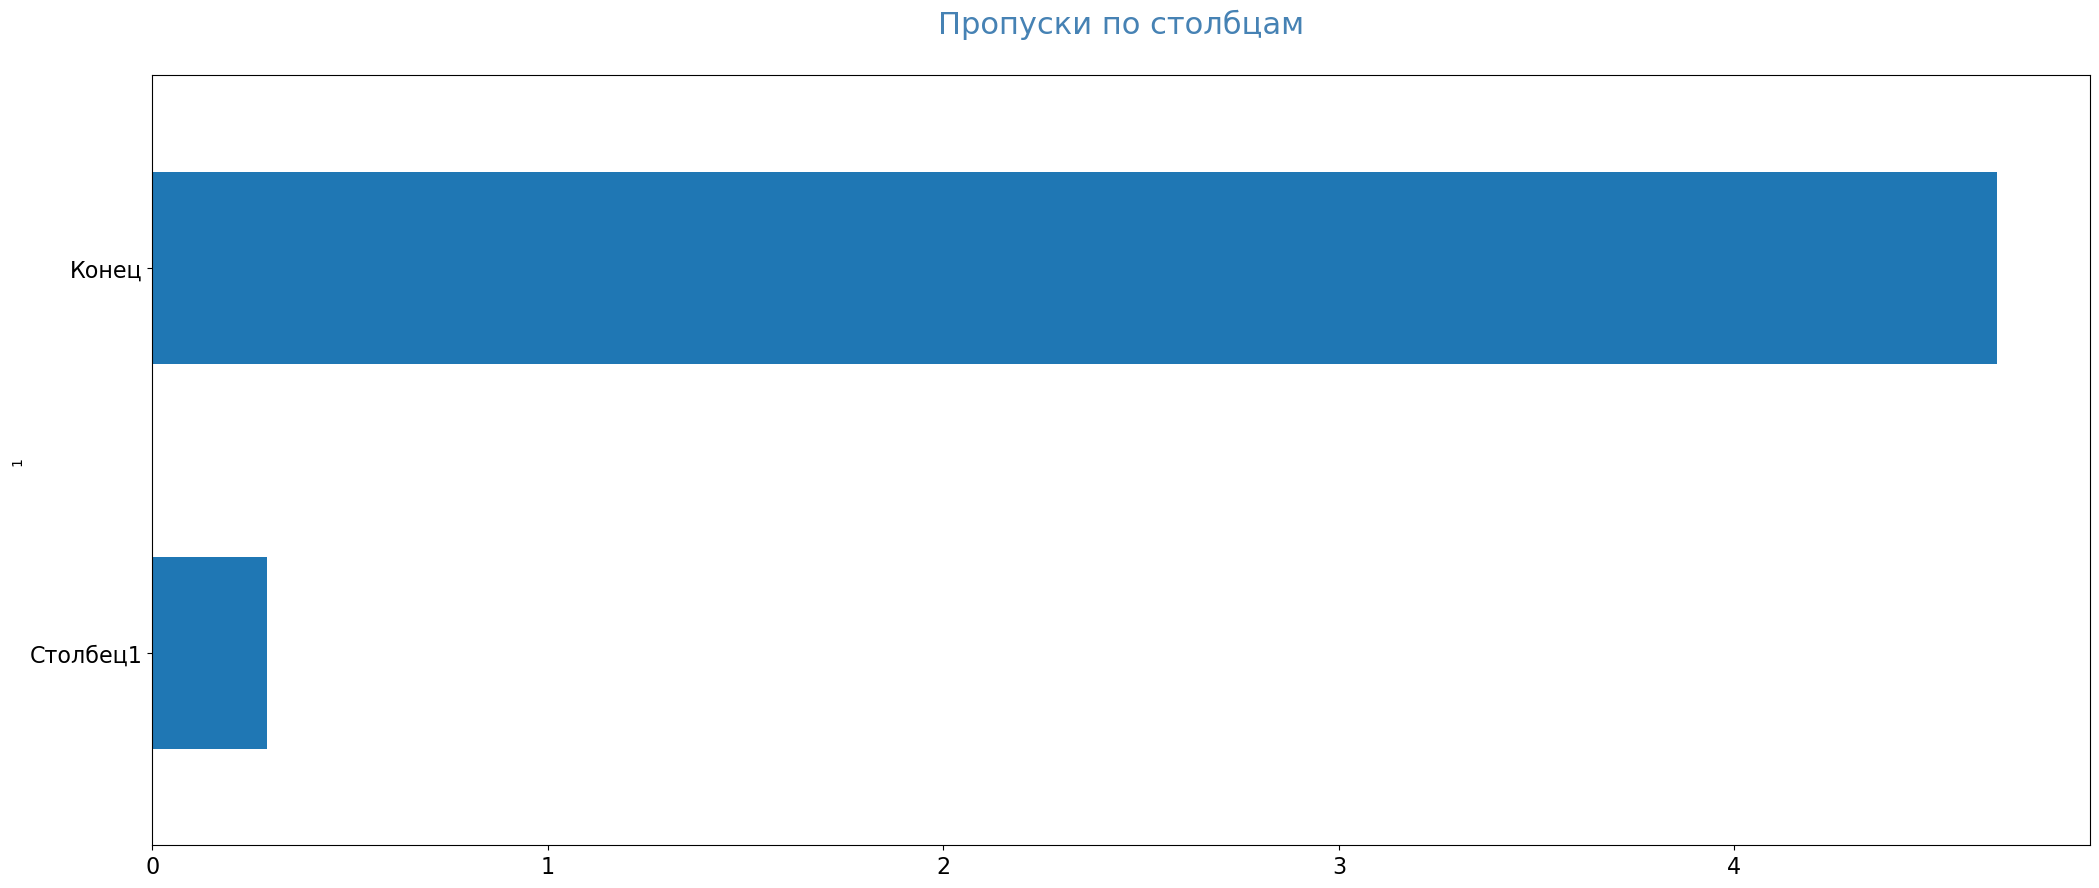

In [47]:
# Построим график с пропусками
pass_value_barh(schedule)

In [48]:

# Удаление дубликатов
schedule =schedule.drop_duplicates(ignore_index=True)
# Удаляем строки, в которых все значения пропущены
schedule = schedule.dropna(how='all')
# Создать словарь для замен сталбцов
schedule = schedule.rename(columns={'Год':'years',
                                    'Столбец2':'date',
                                    'Поток':'course_flow',
                                    'Начало ':'start_time',
                                    'Конец':'end_time',
                                    'Столбец1':'session',
                                    'Код классификатора':'сlassifier_code',
                                    'Столбец12':'direction'})
# Убедимся, что тип данных столбца 'date' - строковый
schedule['date'] = schedule['date'].astype(str)

# Замена ' 00:00:00' на пустую строку
schedule['date'] = schedule['date'].str.replace(' 00:00:00', '')

schedule.start_time = schedule.start_time.fillna('18:00:00')
schedule.end_time = schedule.end_time.fillna('18:00:00')
schedule['start_time_full_с'] = schedule['date'].astype(str) + ' ' + schedule['start_time'].astype(str)
schedule['end_time_full_с'] = schedule['date'].astype(str) + ' ' + schedule['end_time'].astype(str)
# Преобразование столбцов в формат времени (datetime)
schedule['start_time_full_с'] = schedule['start_time_full_с'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))
schedule['end_time_full_с'] = schedule['end_time_full_с'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))

# Избавление от неявных дубликатов
schedule.course_flow = schedule.course_flow.replace('1 поток ', '1 поток')
# преобразовываем в дата-время формата ДД.ММ.ГГГГ
schedule['date'] = pd.to_datetime(schedule['date'], format='%Y-%m-%d')
# Оставляем только необходимые для анализа параметры
schedule = schedule[['date','course_flow','start_time_full_с',\
                     'end_time_full_с','сlassifier_code','direction','session']]



In [49]:

# Объедините датафреймы
schedule1 = pd.concat([schedule, small_events], axis=0)

# Оставляем только необходимые для анализа параметры
schedule1= schedule1[['date','course_flow','start_time_full_с','end_time_full_с',\
                      'сlassifier_code','direction','session']]

### Соединим расписания мероприятий и их просмотры

In [50]:
# Выполнение слияние таблиц
df = pd.merge(data, all_events, on=['course_flow','date'], how='inner')



In [51]:
# df[['date','start_time','end_time','start_timestamp','end_timestamp','start_time_full','end_time_full']]

In [52]:
# Функция фильтрации по совпадению времени просмотра
def filter_data(df):
    return df[
        (
            (df['start_timestamp'] <= df['start_time_full']) &
            (df['end_timestamp'] >= df['end_time_full'])
        ) |
        (
            (df['start_timestamp'] <= df['start_time_full']) &
            (df['start_time_full'] <= df['end_timestamp']) &
            (df['end_timestamp'] <= df['end_time_full'])
        ) |
        (
            (df['start_time_full'] <= df['start_timestamp']) &
            (df['start_timestamp'] <= df['end_time_full']) &
            (df['end_timestamp'] >= df['end_time_full'])
        ) |
        (
            (df['start_time_full'] <= df['start_timestamp']) &
            (df['start_timestamp'] <= df['end_time_full']) &
            (df['start_time_full'] <= df['end_timestamp']) &
            (df['end_timestamp'] <= df['end_time_full'])
        )
    ]

test = filter_data(df)


In [53]:
# Создать словарь для замен сталбцов
dict_test = {
    'city_x': 'city_viewing',
    'city_y': 'city_reporter',
    }

# Переименование столбцов
test.rename(columns=dict_test, inplace=True)


In [54]:
# Оставляем только необходимые для анализа параметры
test1 = test[['date','course_flow','events','uid','oid','barcode','ip','server_session_id','country','region',\
      'city_viewing','profession','start_timestamp','end_timestamp',\
     'start_time_full','end_time_full','report','name','organization','city_reporter'
     ]]

### Соединим расписания мероприятий и их просмотры с словарем рубрик белые ночи

In [55]:
# Выполнение слияние таблиц
test_1 = pd.merge(test1, schedule1, on=['course_flow','date'], how='left')
# Фильтрация по совпадению времени просмотра
test_1 = test_1[(test_1['start_time_full'] >= test_1['start_time_full_с']- pd.Timedelta(minutes=60)) &\
                (test_1['end_time_full'] <= test_1['end_time_full_с']+ pd.Timedelta(minutes=60))]


Так как некоторые мероприятия по таймингу не всегда полностью попадают , я добавлю условия, что мероприятия в рамках одной и той же сессии могут попадать в сессию если начались в пределах 60 минут до и после ее.

### Предобработка просмотров

In [56]:
print(f'После присоединения просмотров к расписанию сохраинлось {test_1.uid.nunique()*100/data.uid.nunique():.2f}% процентов уникальных идентификаторов пользователя')
print(f'После присоединения просмотров к расписанию сохраинлось {test_1.oid.nunique()*100/data.oid.nunique():.2f}% процентов уникальных идентификаторов пользователя,'
      f'\nменяющихся от мероприятия к мероприятию')


После присоединения просмотров к расписанию сохраинлось 94.23% процентов уникальных идентификаторов пользователя
После присоединения просмотров к расписанию сохраинлось 94.15% процентов уникальных идентификаторов пользователя,
меняющихся от мероприятия к мероприятию


In [57]:
# Функция для вычисления времени просмотра трансляции
def calculate_viewing_time(row):
    start_time_full = row['start_time_full']
    end_time_full = row['end_time_full']
    start_timestamp = row['start_timestamp']
    end_timestamp = row['end_timestamp']

    if start_timestamp <= start_time_full and end_time_full <= end_timestamp:
        return (end_time_full - start_time_full).total_seconds() / 60
    elif start_timestamp <= start_time_full and end_timestamp <= end_time_full:
        return (end_timestamp - start_time_full).total_seconds() / 60
    elif start_timestamp >= start_time_full and end_timestamp >= end_time_full:
        return (end_time_full - start_timestamp).total_seconds() / 60
    elif start_timestamp >= start_time_full and end_timestamp <= end_time_full:
        return (end_timestamp - start_timestamp).total_seconds() / 60
    else:
        return 0

test_1['viewing_time'] = test_1.apply(calculate_viewing_time, axis=1)

# Время мероприятия
test_1['translation_time'] = (test_1['end_time_full'] - test_1['start_time_full']).dt.total_seconds() / 60

# Заполнить все пропуски значением 'Unknown'
test_1.fillna('Unknown', inplace=True)

test_1.сlassifier_code = test_1.сlassifier_code.replace('Основное ', 'Нозологии')
# Удаление дубликатов
test_1 = test_1.drop_duplicates(ignore_index=True)


In [58]:
'''
test_7336 = sort_ev[(sort_ev['date']=='2023-04-27')&\
       (sort_ev['uid']==7336)&\

       (sort_ev['server_session_id']=='hUdGabay0nhAyyOIywlwiVOiLMlfZ6dA')&\
       (sort_ev['start_time_full']=='2023-04-27 11:00:00')]
test_7336
test_7336_1= test_7336[['report','start_time_full','start_time_full_с', 'end_time_full_с',\
                        'end_time_full','start_timestamp','end_timestamp',\
                        'direction','viewing_time']]
test_7336_1

columns_with_differences = test_7336[test_7336 != test_7336.iloc[0]]
different_columns = columns_with_differences.columns[columns_with_differences.any()].tolist()
print("Столбцы с различиями:", different_columns)
test_7336_1
'''

'\ntest_7336 = sort_ev[(sort_ev[\'date\']==\'2023-04-27\')&       (sort_ev[\'uid\']==7336)&\n       (sort_ev[\'server_session_id\']==\'hUdGabay0nhAyyOIywlwiVOiLMlfZ6dA\')&       (sort_ev[\'start_time_full\']==\'2023-04-27 11:00:00\')]\ntest_7336\ntest_7336_1= test_7336[[\'report\',\'start_time_full\',\'start_time_full_с\', \'end_time_full_с\',                        \'end_time_full\',\'start_timestamp\',\'end_timestamp\',                        \'direction\',\'viewing_time\']]\ntest_7336_1\n\ncolumns_with_differences = test_7336[test_7336 != test_7336.iloc[0]]\ndifferent_columns = columns_with_differences.columns[columns_with_differences.any()].tolist()\nprint("Столбцы с различиями:", different_columns)\ntest_7336_1\n'

In [59]:

test_2 = test_1.groupby(['date','course_flow','events','uid','oid','barcode',
                            'ip','server_session_id','country','region','city_viewing',
                            'profession','start_timestamp','end_timestamp',\
                         'start_time_full','end_time_full','report','name','organization','city_reporter',
                            'start_time_full_с','end_time_full_с','сlassifier_code','session','translation_time',\
                            'viewing_time'], as_index=False)['direction'].apply(lambda x: ', '.join(x)).reset_index()


In [60]:
# Удаление дубликатов по определенным столбцам
test_2 = test_2.drop_duplicates(subset=['uid', 'oid','server_session_id',\
                               'start_timestamp','end_timestamp','viewing_time',\
                                           'start_time_full_с', 'end_time_full_с'], keep=False)

In [61]:
# Складываем просмотрый по пользователям
sum_test_1 = test_2.groupby(['date','course_flow','events','uid','oid','barcode',
                            'ip','server_session_id','country','region','city_viewing',
                            'profession','report','name','organization','city_reporter',
                            'сlassifier_code','start_time_full', 'end_time_full',
                             'direction','session','translation_time']).agg({'viewing_time':'sum'}).reset_index()
# Исключение строк с разницей меньше или равной 0
new_sum_test_1 = sum_test_1[~(sum_test_1['viewing_time'] - sum_test_1['translation_time'] > 0)]
# Вычисляем процент просмотра
new_sum_test_1['viewing_percentage'] = (new_sum_test_1['viewing_time'] / new_sum_test_1['translation_time']) * 100

# Оставляем только просмотры с процентом больше 50
new_sum_test_2 = new_sum_test_1[new_sum_test_1['viewing_percentage'] > 50]

# Удаляем временный столбец с процентами
new_sum_test_2 = new_sum_test_2.drop(columns=['viewing_percentage'])

In [62]:
# Удалим ненужный столбец
columns_to_drop = ['сlassifier_code']
new_sum_test_2.drop(columns_to_drop, axis=1, inplace=True)


In [63]:
new_sum_test_2.session = new_sum_test_2.session.replace('Актуальные вопросы лучевой терапии ',\
                                                        'Актуальные вопросы лучевой терапии')

strings_to_remove = ['Часть 1', 'Часть 2', '(Часть 1)', '(Часть 2)','  Часть 2','  Часть 1']
# Применяем метод .str.replace() к столбцу 'column_name'

new_sum_test_2.session = new_sum_test_2.session.apply(lambda x: x.replace(strings_to_remove[0], '').replace(strings_to_remove[1], ''))


In [64]:
# new_sum_test_3 =new_sum_test_2[(new_sum_test_2['report'] != 'Дискуссия')&(new_sum_test_2['name'] != 'Unknown')]

small_event = new_sum_test_2[(new_sum_test_2['events']!=\
                           'viii петербургский международный онкологический форум белые ночи') & \
                             (new_sum_test_2['events']!=\
                           'ix петербургский международный онкологический форум белые ночи')
                            ]

forum_viii = new_sum_test_2[(new_sum_test_2['events']==\
                           'viii петербургский международный онкологический форум белые ночи')]
forum_ix = new_sum_test_2[(new_sum_test_2['events']==\
                           'ix петербургский международный онкологический форум белые ночи')]

just_forum = new_sum_test_2[(new_sum_test_2['events']==\
                           'viii петербургский международный онкологический форум белые ночи') | \
                             (new_sum_test_2['events']==\
                           'ix петербургский международный онкологический форум белые ночи')
                            ]

print(f'После присоединения просмотров к расписанию сохранилось {new_sum_test_2.uid.nunique()*100/data.uid.nunique():.2f}% процентов уникальных идентификаторов пользователя')
print(f'После присоединения просмотров к расписанию сохранилось {new_sum_test_2.oid.nunique()*100/data.oid.nunique():.2f}% процентов уникальных идентификаторов пользователя,'
      f'\nменяющихся от мероприятия к мероприятию')


После присоединения просмотров к расписанию сохранилось 79.77% процентов уникальных идентификаторов пользователя
После присоединения просмотров к расписанию сохранилось 78.51% процентов уникальных идентификаторов пользователя,
меняющихся от мероприятия к мероприятию


In [65]:
# Ограничение длины текста в поле "events" до первых 20 символов
new_sum_test_2['events'] = new_sum_test_2['events'].str[:30]
# Ограничение длины текста в поле "session" до первых 20 символов
new_sum_test_2['session'] = new_sum_test_2['session'].str[:30]
new_sum_test_2= new_sum_test_2[new_sum_test_2['name']!='Unknown']

In [66]:

# Указание пути к файлу CSV

csv_path = '/Users/nikitaromanov/Документы/practicum/STD1/датасет NDA/данные/data.csv'

# Сохранение DataFrame в CSV
new_sum_test_2.to_csv(csv_path, index=False)


### Группы пользователей по интересам для автоматизации рассылки приглашений на мероприятия

In [67]:
# Определите все уникальные направления в данных
all_directions = new_sum_test_2['direction'].unique()

# Создайте словарь, в котором ключами будут направления, а значениями будут списки uid
uids_by_direction = {}

# Пройдитесь по каждому направлению и найдите соответствующие uid
for direction in all_directions:
    uids = new_sum_test_2[new_sum_test_2['direction'] == direction]['uid'].unique()
    uids_by_direction[direction] = uids

# uids_by_direction - это словарь, в котором каждое направление связано с соответствующими uid
# uids_by_direction

## Дашбор

<div class="alert alert-success">
    <b>Ссылка на дашборд</b>
    <a href="http://localhost/superset/dashboard/p/vXplbGXYGkJ/" target="_blank" style="color: #856404; text-decoration: underline;">http://localhost/superset/dashboard/p/vXplbGXYGkJ/</a>
</div>


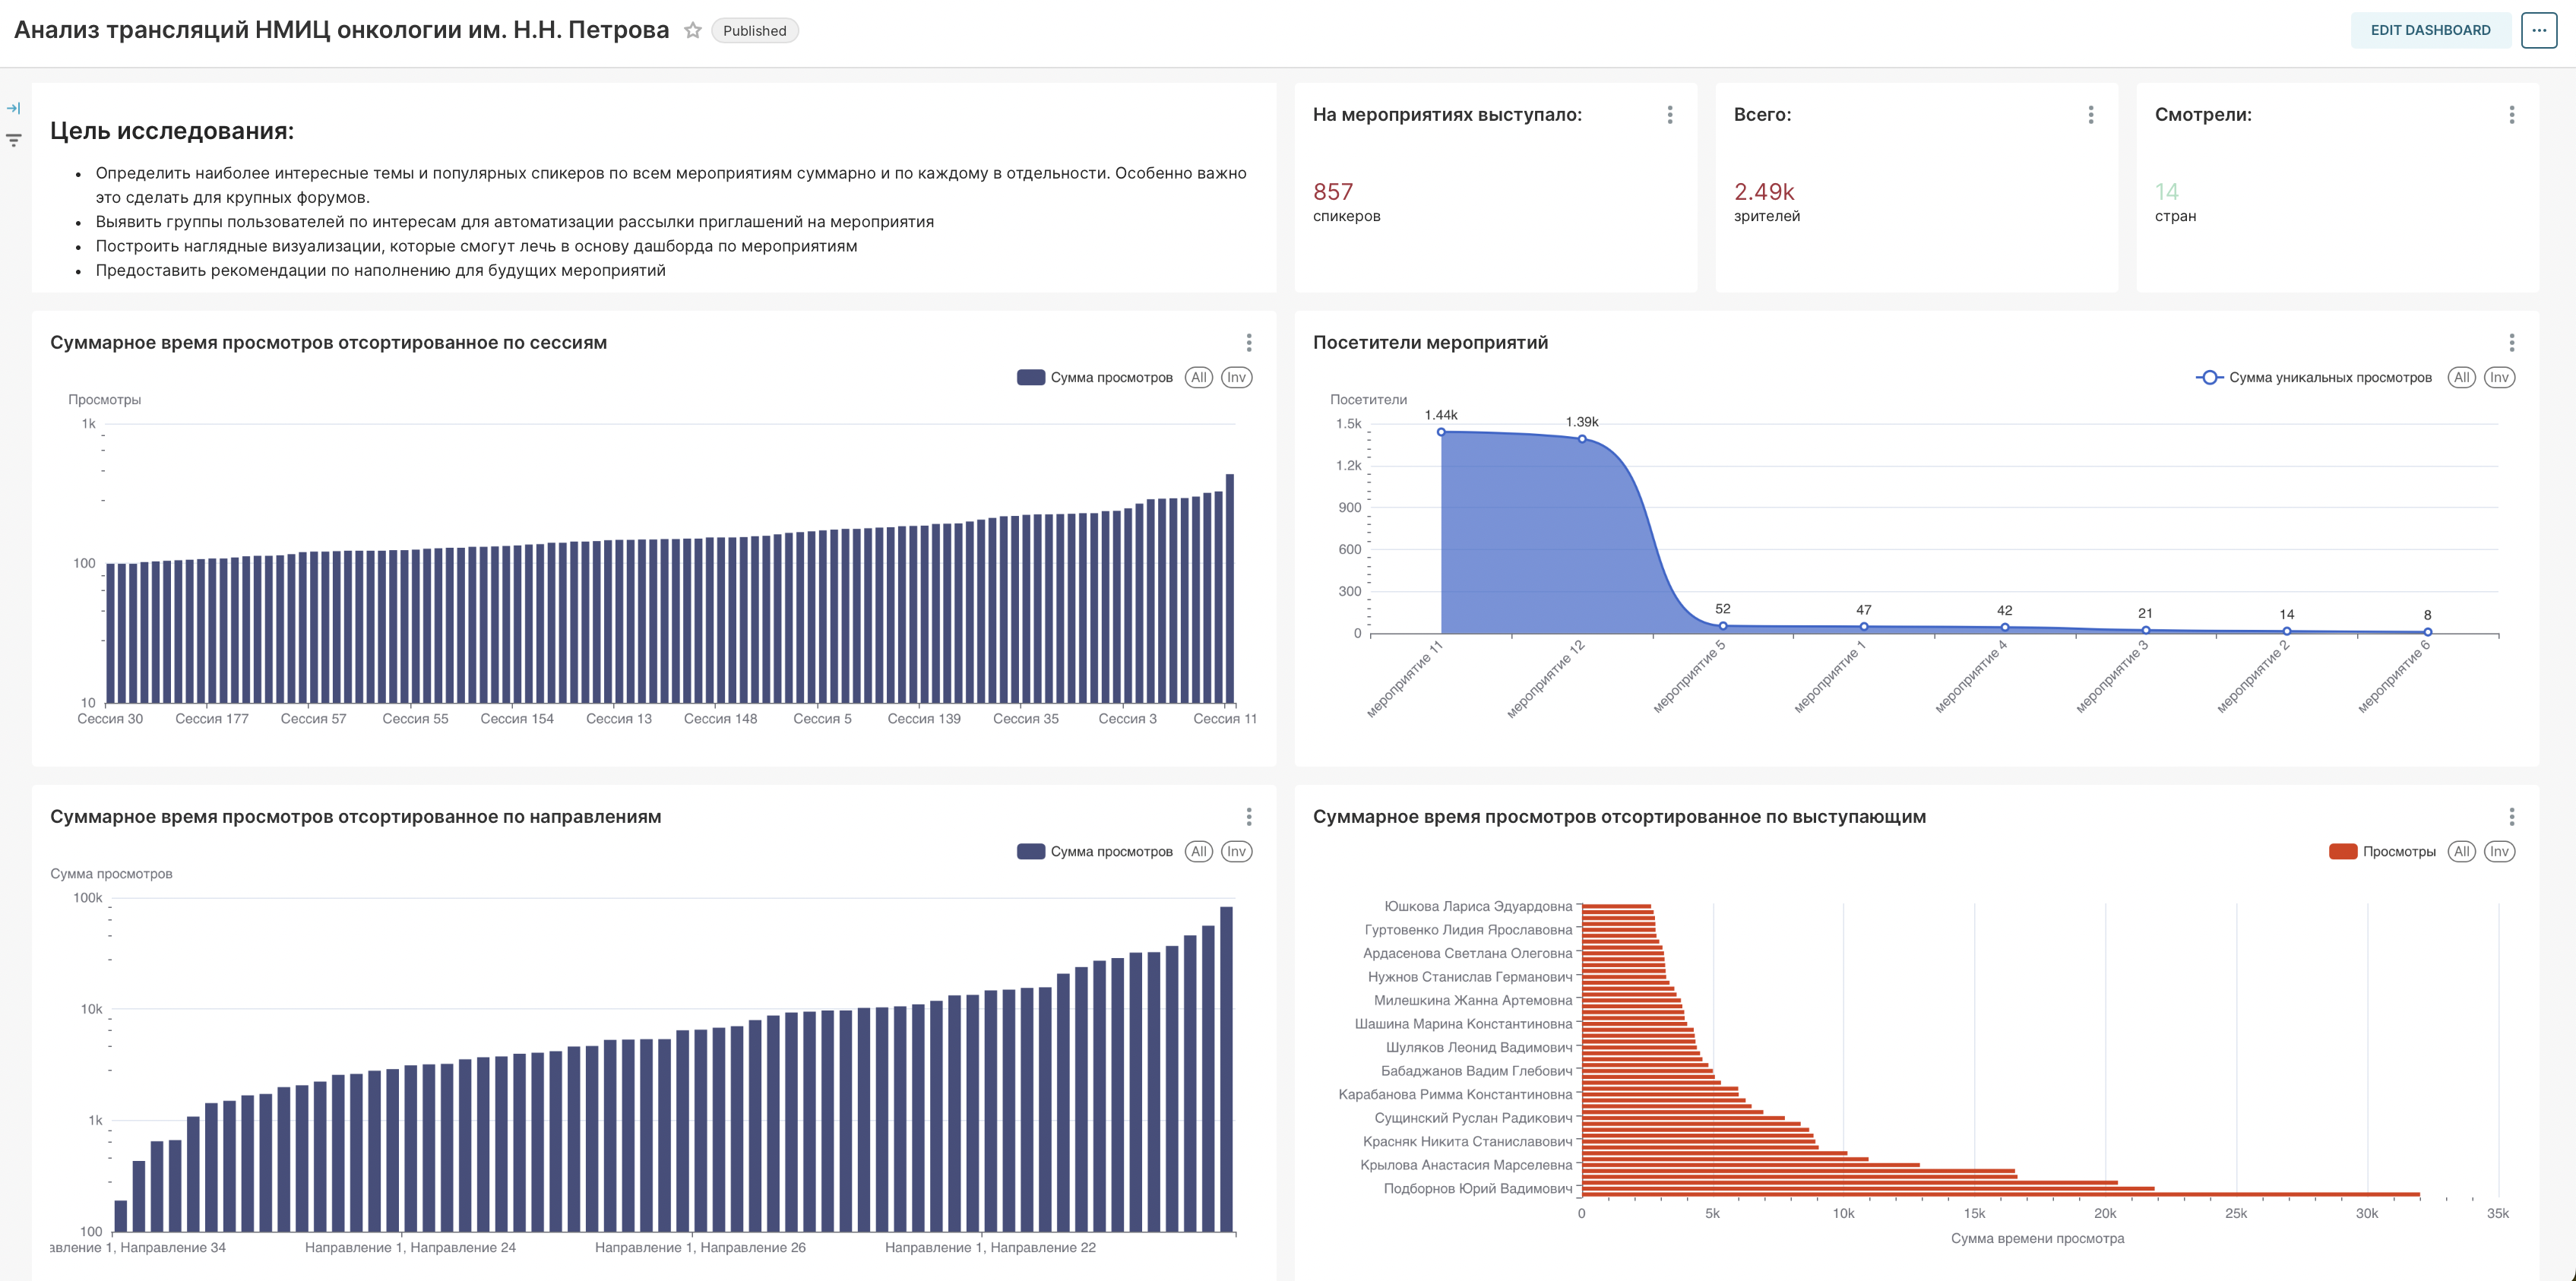

In [68]:
# Укажите путь к изображению
image_path = "дашборд.png"

# Отобразите изображение
Image(filename=image_path)


## Выводы

В рамках проекта по анализу трансляций НМИЦ онкологии им. Н.Н. Петрова были выполнены следующие пункты:
   1. Выгрузка данных
   2. Предобработка данных
   3. Объединение данных по мероприятиям и просмотрам
   4. Сортировка данных удовлетворяющая нашим условиям
   5. Выявления группы пользователей по интересам для автоматизации рассылки приглашений на мероприятия
   6. Построение дашборда

    
Для улучшения работы с данными, предлагаю следующие рекомендации:
 - Ограничение ручного ввода данных. Это может уменьшить ошибки и улучшить обработку информации. Для этого можно использовать выпадающие списки и автоматическое заполнение. Это также сделает данные более единообразными.
 - Использование заранее подготовленной базы: Для имён, должностей, стран и городов, можно создать базу данных или списки с заранее известными значениями. Это позволит пользователям выбирать значения из предложенных вариантов, снижая вероятность ошибок и дублирования.
 - Ограничение одновременного просмотра с одного uid. Чтобы предотвратить несанкционированное использование и дублирование просмотров. Можно внедрить проверку при регистрации или авторизации пользователей.
 
Выводы по исследованию:
- Всего мероприятия смотрело 2,5k зрителей. Выступало 857 спикеров.
- Самыми популярными стали мероприятия 11 и 12. Самыми просматриваемые направления 1,2,3.
- Больше всего посмотрели выступления Инжаковой Ю.А.
С более подробными результатами исследования можно ознакомиться в дашборде. 
http://localhost/superset/dashboard/p/vXplbGXYGkJ/